# Titanic Dataset Analysis

This notebook explores the Titanic dataset and builds classification models to predict survival.

In [2]:
# Download Dataset from Kaggle

import os
import kagglehub

path = kagglehub.dataset_download("shuofxz/titanic-machine-learning-from-disaster")

print("Path to dataset files:", path)

Path to dataset files: /Users/mohammedbalkhair/.cache/kagglehub/datasets/shuofxz/titanic-machine-learning-from-disaster/versions/1


In [3]:
# Load Data

import pandas as pd

# Check what files are available in the dataset
files = os.listdir(path)
print("Files in dataset:", files)

# Load the training dataset (usually named train.csv)
if 'train.csv' in files:
    df = pd.read_csv(os.path.join(path, 'train.csv'))
    print(f"\nLoaded: train.csv")
else:
    # Try to find CSV files
    csv_files = [f for f in files if f.endswith('.csv')]
    if csv_files:
        df = pd.read_csv(os.path.join(path, csv_files[0]))
        print(f"Loaded: {csv_files[0]}")
    else:
        raise FileNotFoundError("No CSV file found in dataset")

print(f"\nDataset shape: {df.shape}")
df.head()

Files in dataset: ['test.csv', 'train.csv']

Loaded: train.csv

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

In [4]:
# Basic Information

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check for missing values

print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values per column:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total missing values: 866
Percentage of missing values per column:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [6]:
# Check target distribution

target_col = 'Survived'

print(f"Target column: {target_col}")
print(f"\nTarget distribution:")
print(df[target_col].value_counts())
print(f"\nTarget distribution (%):")
print(df[target_col].value_counts(normalize=True) * 100)

Target column: Survived

Target distribution:
Survived
0    549
1    342
Name: count, dtype: int64

Target distribution (%):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [7]:
# Explore categorical columns

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Name value counts:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Sex value counts:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket value counts:
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Cabin value counts:
Cabin
B96 B98        4
G6             4
C2

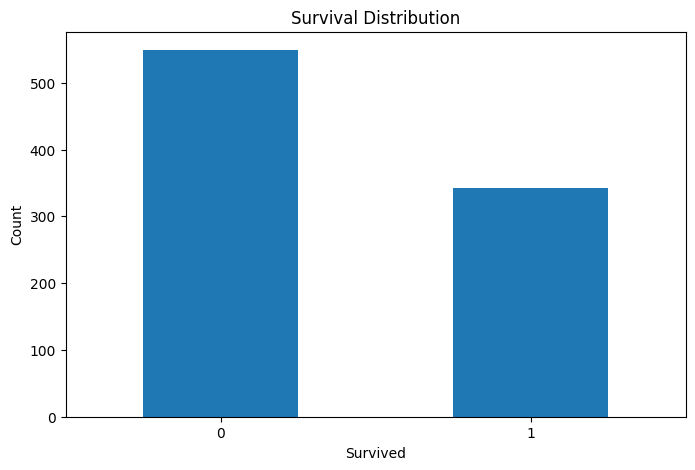

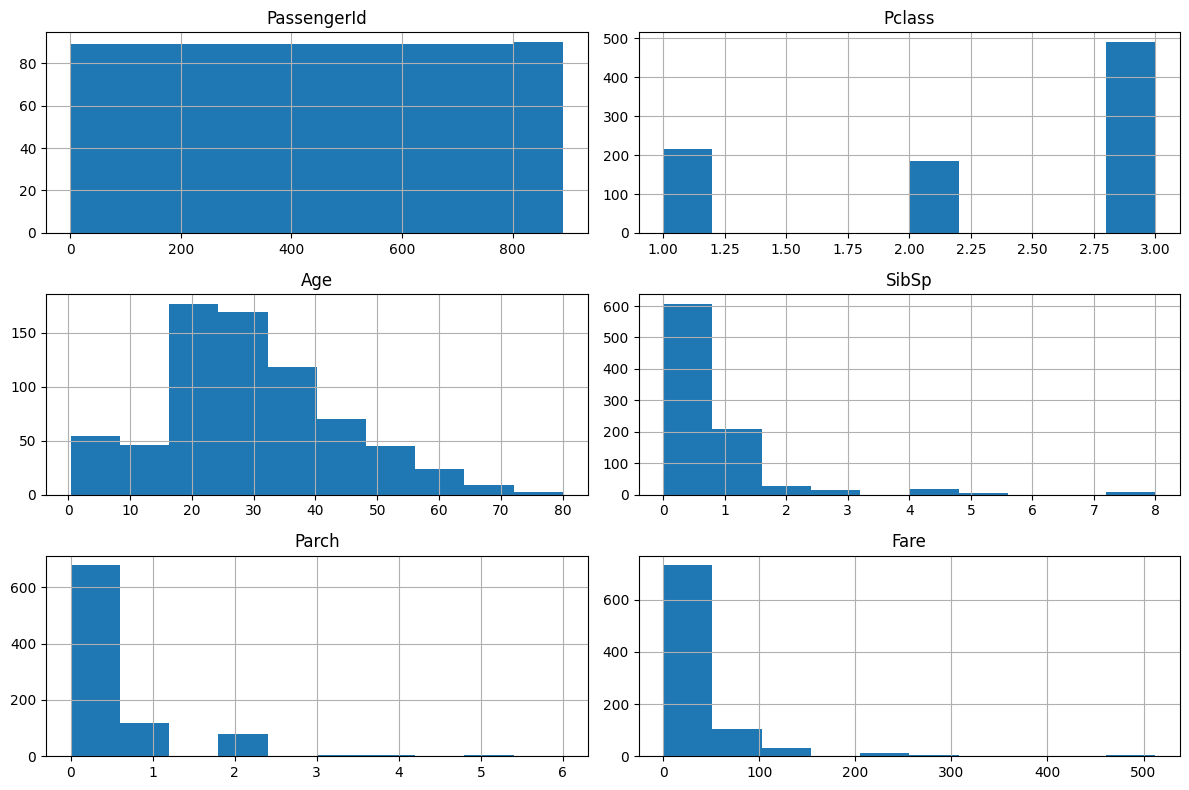

In [8]:
# Visualize distributions

import matplotlib.pyplot as plt
import seaborn as sns

# Plot target distribution
plt.figure(figsize=(8, 5))
df[target_col].value_counts().plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot numerical features distributions
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != target_col]

if len(numerical_cols) > 0:
    df[numerical_cols].hist(figsize=(12, 8))
    plt.tight_layout()
    plt.show()

# Data Preprocessing

In [9]:
# Handle missing values and prepare data
df_processed = df.copy()

# Handle missing values
# For Age: fill with median
if 'Age' in df_processed.columns:
    df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)

# For Embarked: fill with mode (most common value)
if 'Embarked' in df_processed.columns:
    df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)

# For Cabin: we'll drop it or create a flag (too many missing values)
# Option: create a flag for having cabin information
if 'Cabin' in df_processed.columns:
    df_processed['Has_Cabin'] = df_processed['Cabin'].notna().astype(int)
    df_processed.drop(columns=['Cabin'], inplace=True)

print("Missing values after preprocessing:")
print(df_processed.isnull().sum().sum())
print(f"\nDataset shape after preprocessing: {df_processed.shape}")

Missing values after preprocessing:
0

Dataset shape after preprocessing: (891, 12)


/var/folders/n2/n_t41b_d0cd2zqxk4k56tss40000gn/T/ipykernel_46594/2476099686.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
/var/folders/n2/n_t41b_d0cd2zqxk4k56tss40000gn/T/ipykernel_46594/2476099686.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [10]:
# Feature engineering and encoding

# Extract title from Name (if available)
if 'Name' in df_processed.columns:
    df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df_processed['Title'] = df_processed['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df_processed['Title'] = df_processed['Title'].replace('Mlle', 'Miss')
    df_processed['Title'] = df_processed['Title'].replace('Ms', 'Miss')
    df_processed['Title'] = df_processed['Title'].replace('Mme', 'Mrs')
    df_processed.drop(columns=['Name'], inplace=True)

# Drop PassengerId and Ticket (not useful for prediction)
columns_to_drop = ['PassengerId', 'Ticket']
for col in columns_to_drop:
    if col in df_processed.columns:
        df_processed.drop(columns=[col], inplace=True)

print("Remaining columns:", df_processed.columns.tolist())

Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'Title']


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/var/folders/n2/n_t41b_d0cd2zqxk4k56tss40000gn/T/ipykernel_46594/2322523111.py:5: SyntaxWarning: invalid escape sequence '\.'
  df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [11]:
# Encode categorical variables

# Separate numerical and categorical features (excluding target)
feature_cols = [col for col in df_processed.columns if col != target_col]
categorical_features = [col for col in feature_cols if df_processed[col].dtype == 'object']
numerical_features = [col for col in feature_cols if col not in categorical_features]

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

# One-hot encode categorical features
if categorical_features:
    cat_encoded = pd.get_dummies(df_processed[categorical_features], drop_first=False)
    # Combine numerical and encoded categorical
    X = pd.concat([df_processed[numerical_features], cat_encoded], axis=1)
else:
    X = df_processed[numerical_features]

y = df_processed[target_col]

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
X.head()

Categorical features: ['Sex', 'Embarked', 'Title']
Numerical features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']

Final feature matrix shape: (891, 16)
Target shape: (891,)

Feature columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,1,0,7.2500,0,False,True,False,False,True,False,False,True,False,False
1,1,38.0,1,0,71.2833,1,True,False,True,False,False,False,False,False,True,False
2,3,26.0,0,0,7.9250,0,True,False,False,False,True,False,True,False,False,False
3,1,35.0,1,0,53.1000,1,True,False,False,False,True,False,False,False,True,False
4,3,35.0,0,0,8.0500,0,False,True,False,False,True,False,False,True,False,False


# Model Training

In [12]:
import sys
sys.path.append('../')

import numpy as np
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print(f"\nTraining classes distribution:")
print(y_train.value_counts())
print(f"\nTest classes distribution:")
print(y_test.value_counts())

Training set shape: (712, 16)
Test set shape: (179, 16)

Training classes distribution:
Survived
0    444
1    268
Name: count, dtype: int64

Test classes distribution:
Survived
0    105
1     74
Name: count, dtype: int64


In [13]:
# Train Logistic Regression Model

from src import get_logistic_regression

lr_model = get_logistic_regression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")
print(f"Model type: {type(lr_model).__name__}")

Logistic Regression model trained successfully!
Model type: LogisticRegression


In [14]:
# Train Random Forest Classifier Model

from src import get_random_forest_classifier

rf_model = get_random_forest_classifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained successfully!")
print(f"Model type: {type(rf_model).__name__}")

Random Forest Classifier model trained successfully!
Model type: RandomForestClassifier


# Model Evaluation

In [15]:
# Evaluate Logistic Regression

from src import display_metrics, precision, recall, f1_score
from sklearn.metrics import accuracy_score

y_pred_lr = lr_model.predict(X_test)

print("="*60)
print("LOGISTIC REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

display_metrics(y_test, y_pred_lr, task_type='classification')

LOGISTIC REGRESSION MODEL PERFORMANCE
Accuracy: 0.8324
Precision: 0.7973
Recall: 0.7973
F1 Score: 0.7973
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 0.797297
  Recall:    0.797297
  F1 Score:  0.797297



In [16]:
# Evaluate Random Forest Classifier

y_pred_rf = rf_model.predict(X_test)

print("="*60)
print("RANDOM FOREST CLASSIFIER MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

display_metrics(y_test, y_pred_rf, task_type='classification')

RANDOM FOREST CLASSIFIER MODEL PERFORMANCE
Accuracy: 0.8212
Precision: 0.7838
Recall: 0.7838
F1 Score: 0.7838
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 0.783784
  Recall:    0.783784
  F1 Score:  0.783784



In [17]:
# Compare Models

print("="*60)
print("MODEL COMPARISON")
print("="*60)
print(f"{'Metric':<15} {'Logistic Regression':<20} {'Random Forest':<20}")
print("-"*60)
print(f"{'Accuracy':<15} {accuracy_score(y_test, y_pred_lr):<20.4f} {accuracy_score(y_test, y_pred_rf):<20.4f}")
print(f"{'Precision':<15} {precision(y_test, y_pred_lr):<20.4f} {precision(y_test, y_pred_rf):<20.4f}")
print(f"{'Recall':<15} {recall(y_test, y_pred_lr):<20.4f} {recall(y_test, y_pred_rf):<20.4f}")
print(f"{'F1 Score':<15} {f1_score(y_test, y_pred_lr):<20.4f} {f1_score(y_test, y_pred_rf):<20.4f}")
print("="*60)

MODEL COMPARISON
Metric          Logistic Regression  Random Forest       
------------------------------------------------------------
Accuracy        0.8324               0.8212              
Precision       0.7973               0.7838              
Recall          0.7973               0.7838              
F1 Score        0.7973               0.7838              
